## 一、 常见离散型分布

In [39]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson
import matplotlib.pyplot as plt

### 1. $Binomial$ $Distribution$ $as:$ $B(n,p)$

$\Rightarrow Description: n次成功概率p的伯努利实验成功次数X服从的分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PMF}&: P(X=x) = C^x_np^x(1-p)^{n-x},x\in\{1,2,..,n\}\\
Expectation&: E(X) = np\\
Variance&: Var(X) = np(1-p)
\end{aligned}\end{equation}
$$

<Figure size 432x288 with 0 Axes>

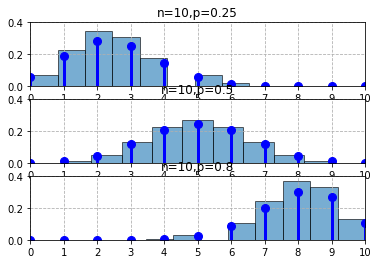

In [35]:
## PMF and sampling by binomial distribution: B(n,p)
plt.clf()
fig,ax = plt.subplots(3,1)
params = [
    # (n,p)
    (10,0.25),
    (10,0.5),
    (10,0.8),
]
x = range(0,11)
for i in range(len(params)):
    # B(n,p)
    binom_rv = binom(n=params[i][0], p=params[i][1]) 
    # PMF
    ax[i].plot(x,binom_rv.pmf(x),'bo',ms=8)
    ax[i].vlines(x,0,binom_rv.pmf(x),colors='b',lw=3)
    # random sampling 
    rvs = binom_rv.rvs(size=100000) # sample
    ax[i].hist(rvs,bins=11,density=True,alpha=0.6,edgecolor='k')
    
    ax[i].set_title('n={},p={}'.format(params[i][0],params[i][1]))
    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,0.4)
    ax[i].set_xticks(x)
    ax[i].grid(ls='--')

### 2. $Geometric$ $Distribution$ $as:$ $G(p)$

$\Rightarrow Description: 一直做成功概率为p的伯努利实验，直到第X次才成功的次数X所服从的分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PMF}&: P(X=x) = p(1-p)^{x-1},x\in\{1,2,...\}\\
Expectation&: E(X) = \cfrac{1}{p}\\
Variance&: Var(X) = \cfrac{1-p}{p^2}
\end{aligned}\end{equation}
$$

<Figure size 432x288 with 0 Axes>

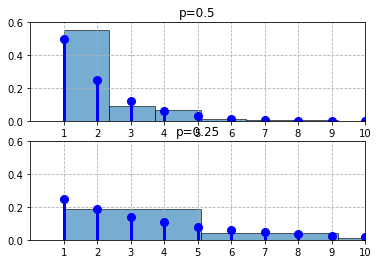

In [38]:
## PMF and sampling by geometric distribution: G(p)
plt.clf()
fig,ax = plt.subplots(2,1)
params = [0.5,0.25]
x = range(1,11)
for i in range(len(params)):
    # G(p)
    geom_rv = geom(p=params[i]) 
    # PMF
    ax[i].plot(x,geom_rv.pmf(x),'bo',ms=8)
    ax[i].vlines(x,0,geom_rv.pmf(x),colors='b',lw=3)
    # random sampling 
    rvs = geom_rv.rvs(size=100000) # sample
    ax[i].hist(rvs,bins=11,density=True,alpha=0.6,edgecolor='k')
    
    ax[i].set_title('p={}'.format(params[i]))
    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,0.6)
    ax[i].set_xticks(x)
    ax[i].grid(ls='--')

### 3. $Poisson$ $Distribution$ $as:$ $P(\mu)$

$\Rightarrow Description: n\rightarrow \infty,p\rightarrow 0,np \rightarrow \mu >0的二项分布所收敛的分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PMF}&: P(X=x) = e^{-\mu}\cfrac{\mu^x}{x!},x\in\{0,1,2,...\}\\
Expectation&: E(X) = \mu\\
Variance&: Var(X) = \mu
\end{aligned}\end{equation}
$$

<Figure size 432x288 with 0 Axes>

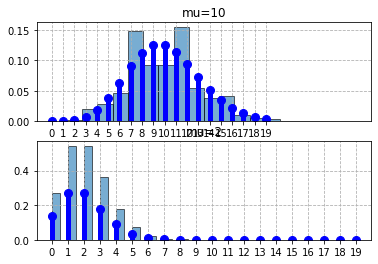

In [43]:
## PMF and sampling by poisson distribution: P(mu)
plt.clf()
fig,ax = plt.subplots(2,1)
params = [10,2]
x = range(0,20)
for i in range(len(params)):
    # P(mu)
    pos_rv = poisson(mu=params[i]) 
    # PMF
    ax[i].plot(x,pos_rv.pmf(x),'bo',ms=8)
    ax[i].vlines(x,0,pos_rv.pmf(x),colors='b',lw=5)
    # random sampling 
    rvs = pos_rv.rvs(size=100000) # sample
    ax[i].hist(rvs,bins=20,density=True,alpha=0.6,edgecolor='k')
    
    ax[i].set_title('mu={}'.format(params[i]))
    ax[i].set_xticks(x)
    ax[i].grid(ls='--')

## 二、 常见连续型分布

In [61]:
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform
import numpy as np

### 1. $Normal$ $Distribution$ $as:$ $N(\mu,\sigma^2)$

$\Rightarrow Description: 任意期望为\mu,方差为\sigma^2的分布在中心极限定理下所收敛的分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PDF}&: p(X=x) = \cfrac{1}{\sqrt{2\pi}\sigma}\exp{[\frac{(x-\mu)^2}{2\sigma^2}]},x\in \mathrm{R}\\
Expectation&: E(X) = \mu\\
Variance&: Var(X) = \sigma^2
\end{aligned}\end{equation}
$$

<Figure size 432x288 with 0 Axes>

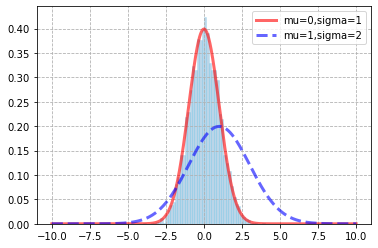

In [59]:
## PDF and sampling by normal distribution: N(mu,sigma)
plt.clf()
fig,ax = plt.subplots(1,1)
# N(mu,sigma)
norm_0 = norm(loc=0,scale=1)
norm_1 = norm(loc=1,scale=2)
# PDF
x = np.linspace(-10,10,1000)
ax.plot(x,norm_0.pdf(x),color='red',lw=3,alpha=0.6,label='mu=0,sigma=1')
ax.plot(x,norm_1.pdf(x),color='blue',lw=3,alpha=0.6,label='mu=1,sigma=2',ls='--')
# sampling
norm_rvs = norm_0.rvs(size=5000)
ax.hist(norm_rvs,bins=50,density=True,alpha=0.3,edgecolor='skyblue')

ax.legend(loc='best')
plt.grid(ls='--')

### 2. $Exponential$ $Distribution$ $as:$ $E(\lambda)$

$\Rightarrow Description: 以连续时间作为随机变量的“连续型几何分布”，表征某个事件发生前所用的时间X（如仪器的使用寿命）的分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PDF}&: p(X=x) = \lambda e^{-\lambda x},x\in \mathrm{R_+}\\
Expectation&: E(X) = \cfrac{1}{\lambda}\\
Variance&: Var(X) = \cfrac{1}{\lambda^2}
\end{aligned}\end{equation}
$$

<Figure size 432x288 with 0 Axes>

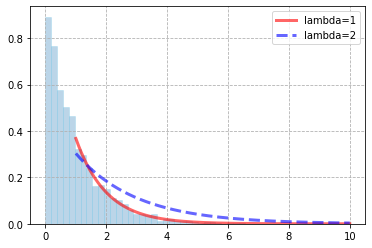

In [60]:
## PDF and sampling by exponential distribution: E(lambda)
plt.clf()
fig,ax = plt.subplots(1,1)
# E(lambda)
expon_0 = expon(scale=1)
expon_1 = expon(scale=2)
# PDF
x = np.linspace(1,10,1000)
ax.plot(x,expon_0.pdf(x),color='red',lw=3,alpha=0.6,label='lambda=1')
ax.plot(x,expon_1.pdf(x),color='blue',lw=3,alpha=0.6,label='lambda=2',ls='--')
# sampling
expon_rvs = expon_0.rvs(size=5000)
ax.hist(expon_rvs,bins=50,density=True,alpha=0.3,edgecolor='skyblue')

ax.legend(loc='best')
plt.grid(ls='--')

### 3. $Uniform$ $Distribution$ $as:$ $U(a,b)$

$\Rightarrow Description: 在区间(a,b)上等概率采样的实数所服从的分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PDF}&: p(X=x) = \cfrac{1}{b-a},x\in (a,b)\\
Expectation&: E(X) = \cfrac{b+a}{2}\\
Variance&: Var(X) = \cfrac{(b-a)^2}{12}
\end{aligned}\end{equation}
$$

<Figure size 432x288 with 0 Axes>

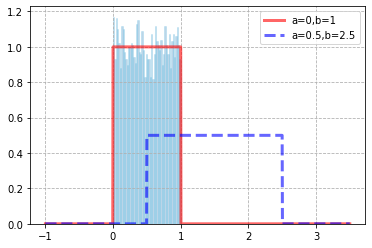

In [63]:
## PDF and sampling by uniform distribution: U(a,b)
plt.clf()
fig,ax = plt.subplots(1,1)
# U(a,b)
uniform_0 = uniform(loc=0,scale=1)
uniform_1 = uniform(loc=0.5,scale=2)
# PDF
x = np.linspace(-1,3.5,1000)
ax.plot(x,uniform_0.pdf(x),color='red',lw=3,alpha=0.6,label='a=0,b=1')
ax.plot(x,uniform_1.pdf(x),color='blue',lw=3,alpha=0.6,label='a=0.5,b=2.5',ls='--')
# sampling
uniform_rvs = uniform_0.rvs(size=5000)
ax.hist(uniform_rvs,bins=50,density=True,alpha=0.3,edgecolor='skyblue')

ax.legend(loc='best')
plt.grid(ls='--')

## 三、多元高斯分布

### 1. $Multivariate$ $Gaussian$ $Distribution$ $as:$ $N(\vec\mu,\Sigma)$

$\Rightarrow Description: p维随机向量X服从的均值向量为\vec\mu，协方差矩阵为\Sigma的p维正态分布$

$\Rightarrow Metrics:$

$$\begin{equation}\begin{aligned}
\mathrm{PDF}&: p(X=\vec x) = \cfrac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}\exp{[-\frac{1}{2}(\vec x-\vec\mu)^T\Sigma^{-1}(\vec x-\vec\mu)]},\vec x\in \mathbf{R}^p\\
Expectation&: E(X) = \vec\mu\\
Variance&: Var(X) = \mathrm{diag}(\Sigma)\\
Covariance&: Cov(X_i,X_j) = \Sigma_{ij}
\end{aligned}\end{equation}
$$

$\Rightarrow Properties:$

$$\begin{equation}\begin{aligned}
& ① 多元高斯分布的联合分布、边缘分布、条件分布仍然是多元高斯分布\\
& ② 联合分布：考察p维随机变量X_p\sim N(\vec\mu_p,\Sigma_p)和q维随机变量X_q\sim N(\vec\mu_q,\Sigma_q)\\
& 令n=p+q，则X_n = \left[\begin{matrix}X_p\\X_q \end{matrix}\right]\sim N(\vec\mu_n,\Sigma_n)，其中：\\
& \quad\quad\quad\quad\quad\quad \vec\mu_n = \left[\begin{matrix}\vec\mu_p\\\vec\mu_q \end{matrix}\right],\Sigma_n=\left[\begin{matrix}\Sigma_{pp} & \Sigma_{pq}\\\Sigma_{qp} & \Sigma_{qq} \end{matrix}\right]\\
& ③ 条件分布：同②假设，\tilde{X}_q = X_{q|p}\sim N(\vec\mu_{q|p},\Sigma_{q|p})，其中：\\
& \quad\quad\quad\quad \vec\mu_{q|p} = \vec\mu_{q}+\Sigma_{qp}\Sigma_{pp}^{-1}(X_p-\vec\mu_p), \;\Sigma_{q|p}=\Sigma_{qq} - \Sigma_{qp}\Sigma_{pp}^{-1}\Sigma_{pq}\\
\end{aligned}\end{equation}
$$

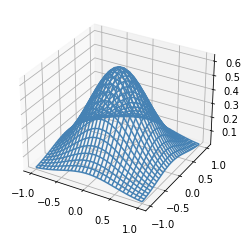

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])
z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z,color='steelblue')
plt.show()

$\Rightarrow Explanation:$

$首先协方差矩阵\Sigma是正定对称矩阵，可得正交特征分解: \Sigma = Q\Lambda Q^T，其中Q为正交矩阵，满足QQ^T=I，\Lambda为特征值对角矩阵$

$设Q由一组标准正交向量[\vec q_1,\vec q_2,..,\vec q_p]组成，则\Sigma = \sum\limits_{i=1}^p \vec q_i\lambda_i\vec q_i^T\Rightarrow\Sigma^{-1} = (Q\Lambda Q^T)^{-1} = Q^{-T}\Lambda^{-1}Q^{-1} = Q\Lambda^{-1}Q^T = \sum\limits_{i=1}^p \vec q_i\cfrac{1}{\lambda_i}\vec q_i^T$

$可得：(\vec x-\vec\mu)^T\Sigma^{-1}(\vec x-\vec\mu) = (\vec x-\vec\mu)^T[\sum\limits_{i=1}^p \vec q_i\cfrac{1}{\lambda_i}\vec q_i^T](\vec x-\vec\mu) = \sum\limits_{i=1}^p (\vec x-\vec\mu)^T\vec q_i\cfrac{1}{\lambda_i}\vec q_i^T(\vec x-\vec\mu) = \sum\limits_{i=1}^p y_i\cfrac{1}{\lambda_i}y_i^T=\sum\limits_{i=1}^p \cfrac{y_i^2}{\lambda_i}$

$其中y_i=(\vec x-\vec\mu)^T\vec q_i=\langle \vec x-\vec\mu,\vec q_i\rangle，(\vec x-\vec \mu)是对样本向量\vec x去中心化，使得原点成为分布的中心，而与单位正交向量\vec q_i点乘，是在\vec q_i方向做投影$

$因此y_i是样本向量\vec x在方向\vec q_i上的投影长度，又由于q_i彼此正交，故\vec y可以看做\vec x在以[\vec q_1,\vec q_2,..,\vec q_p]为基向量的线性空间下的坐标向量$

$令\sum\limits_{i=1}^p \cfrac{y_i^2}{\lambda_i} = C，其中C>0是某个正常数，易知满足该约束的坐标向量\vec y均落在半轴长依次为\sqrt{C\lambda_1},\sqrt{C\lambda_2},..\sqrt{C\lambda_p}的p维椭球面\Pi_C^p上$

$而落在椭球面\Pi_C^p上的坐标向量\vec y，其出现的概率均为p_C = \cfrac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}\exp[-\cfrac{1}{2}\sum\limits_{i=1}^p \cfrac{y_i^2}{\lambda_i}] = \cfrac{e^{-\frac{C}{2}}}{(2\pi)^{p/2}|\Sigma|^{1/2}}$

$因此落在同一椭球面\Pi_C^p上的样本点出现的概率相同，且随着C的增大，椭球体积增大，样本点出现概率p_C减小，椭球越稀疏$

$换个角度看，若固定C=1，则椭球面\Pi_1^p的各半轴长为\{\sqrt{\lambda_i}\}，即协方差矩阵\Sigma的各奇异值$

$而||\Sigma||_2 = \max\limits_{i}{\sqrt{\lambda_i}} = \sqrt{\lambda_*}为\Sigma的谱范数，对应椭球上的最长轴，因此其所对应的特征向量\vec q_*决定了样本差异最大的特征方向$

$综上：服从多元高斯分布N(\vec\mu,\Sigma)的随机向量X，其样本点的分布形状为一圈圈同心的椭球面，在同一椭球面上的样本点出现的概率相同，$
$而椭球面各个轴的长度正比于对应的奇异值的大小，各个轴的方向由协方差矩阵正交特征分解出的各个特征向量所决定$

singular values: [5.         7.07106781],[10.         14.14213562]
eigen vectors: [-0.8  0.6],[-0.6 -0.8]


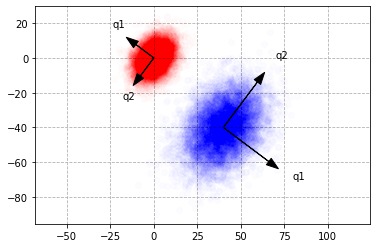

In [52]:
# 2-dimentional Gaussian Distribution sampling
import numpy as np
import matplotlib.pyplot as plt
# mean and conv
mean1 = np.array([0,0])
mean2 = np.array([40,-40])
cov1 = np.array([
    [34,12],
    [12,41]
])
cov2 = 4*cov1
# sampling
x1,y1 = np.random.multivariate_normal(mean1,cov1,size=10000).T
x2,y2 = np.random.multivariate_normal(mean2,cov2,size=10000).T
# plot samples
plt.plot(x1,y1,'ro',alpha=0.01)
plt.plot(x2,y2,'bo',alpha=0.01)
plt.grid(ls='--')
plt.axis('equal')
# draw ellipse's axes by orthogonal eigen vectors
val1,vec1 = np.linalg.eig(cov1)
val2,vec2 = np.linalg.eig(cov2)
sing1 = np.sqrt(val1)
sing2 = np.sqrt(val2)
print("singular values: {},{}".format(sing1,sing2))
print("eigen vectors: {},{}".format(vec1[:,0],vec2[:,1]))

beta = 20
arrowprops=dict(facecolor='black', shrink=0.01,width=0.1,headwidth=8)
plt.annotate('',beta*vec1[:,0],mean1,arrowprops=arrowprops)
plt.annotate('',beta*vec1[:,1],mean1,arrowprops=arrowprops)
plt.text(1.5*beta*vec1[:,0][0],1.5*beta*vec1[:,0][1],s='q1')
plt.text(1.5*beta*vec1[:,1][0],1.5*beta*vec1[:,1][1],s='q2')

plt.annotate('',-(2*beta*vec2[:,0]-mean2),mean2,arrowprops=arrowprops)
plt.annotate('',-(2*beta*vec2[:,1]-mean2),mean2,arrowprops=arrowprops)
plt.text((-(2.5*beta*vec2[:,0]-mean2))[0],(-(2.5*beta*vec2[:,0]-mean2))[1],s='q1')
plt.text((-(2.5*beta*vec2[:,1]-mean2))[0],(-(2.5*beta*vec2[:,1]-mean2))[1],s='q2')

plt.show()